In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import units as u

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [3]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [4]:
c=3e8*u.m/u.s
lam=6e-2*u.m

In [5]:
th_0=(15*u.deg).to(u.rad)

In [6]:
b=60*u.m

In [7]:
res_int=(lam/b)*u.rad
res_int

<Quantity 0.001 rad>

In [8]:
fov=lam/(5*u.m)*u.rad
fov.to(u.deg)

<Quantity 0.68754935 deg>

In [9]:
omega=2*np.pi*u.rad/(24*u.h)

In [10]:
(fov/omega).to(u.s)

<Quantity 165.011845 s>

In [11]:
n_fringes=int(fov/res_int)
n_fringes

12

In [12]:
theta=np.linspace(th_0-fov/2,th_0+fov/2,100*n_fringes)

In [13]:
theta

<Quantity [0.25579939,0.2558094 ,0.2558194 ,...,0.26777937,0.26778938,
           0.26779939] rad>

In [14]:
r_c=np.cos(2*np.pi*u.rad*(b/lam)*np.sin(theta))+1j*np.sin(2*np.pi*u.rad*(b/lam)*np.sin(theta))

In [15]:
def sq_source(time,theta,width):
    aaa=np.zeros(len(theta))
    if time < width: 
        aaa[0:time]=1
    if time >=width:
        aaa[time-width:time]=1
    myfft=(np.fft.fft(aaa))
    return aaa,myfft#,flux

In [16]:
width=200

In [17]:
spfreq=np.fft.fftfreq(len(theta), d=theta[1]-theta[0])
response=[]
timef=1600
tscale=((fov/omega)*timef/len(theta)).to(u.s)

for time in range(timef):
    aaa,myfft=sq_source(time,theta,width)
    intfft=(np.fft.fft(0.5*(width/len(theta))**2*r_c))
    res=np.abs(np.fft.ifft(intfft*myfft))[100*n_fringes//2]
    response+=[res]

In [18]:
tscale

<Quantity 220.01579333 s>

In [19]:
def plot_r(time,theta,r_c,width,timef): # not working properly because rc was previously only cos now is complex

    aaa,myfft=sq_source(time,theta,width)
    intfft=(np.fft.fft(0.5*(width/len(theta))**2*r_c))
    timear=np.arange(timef)
    image=np.abs(np.fft.ifft(intfft*myfft))
    fig, ax = plt.subplots(2, 3,figsize=(15,5))
    ax[0,0].plot(theta,aaa)
    ax[0,0].set_xlabel(r'$\theta$ (rad)')
    ax[0,0].set_ylabel(r'$I_\nu$ (arb. units)')
    ax[0,0].set_title('Source in FOV')

    ax[0,1].plot(theta,0.5*(width/len(theta))**2*np.real(r_c))
    ax[0,1].set_xlabel(r'$\theta$ (rad)')
    ax[0,1].set_ylabel(r'$R_C$')
    ax[0,1].set_title('Interferometer sky response')

    ax[0,2].plot(spfreq,np.abs(myfft))
    ax[0,2].axvline(b/lam,c='r')
    ax[0,2].set_xlim(0,10*b/lam)
    ax[0,2].set_title('FT of source profile')
    ax[0,2].set_xlabel(r'Spatial frequencies (rad$^{-1}$)')

    ax[1,0].plot(spfreq,np.abs(intfft))
    ax[1,0].axvline(b/lam,c='r')
    ax[1,0].set_xlim(0,10*b/lam)
    ax[1,0].set_title('FT of interferometer sky response (u-coverage)')
    ax[1,0].set_xlabel(r'Spatial frequencies (rad$^{-1}$)')

    ax[1,1].plot(theta,image)
    ax[1,1].axvline(theta[100*n_fringes//2].value,c='g')
    ax[1,1].set_title('Interferometer response (snapshot)')
    ax[1,1].set_xlabel(r'$\theta$ (rad)')


    ax[1,2].plot((timear-timef+time)*(tscale.value)/timef,response[::-1],c='g')
    ax[1,2].set_xlim(0,tscale.value)
    ax[1,2].set_xlabel('$t$ (s)')
    ax[1,2].set_title('Interferometer response (recorded at FOV center)')
    

    plt.tight_layout()
    plt.show()


In [20]:
slider=widgets.IntSlider(min=0, max=timef, step=10, value=760)
interact(plot_r,time=slider,theta=fixed(theta),r_c=fixed(r_c),width=fixed(width),timef=fixed(timef));


interactive(children=(IntSlider(value=760, description='time', max=1600, step=10), Output()), _dom_classes=('w…

In [52]:
aaa,myfft=sq_source(270,theta,width)


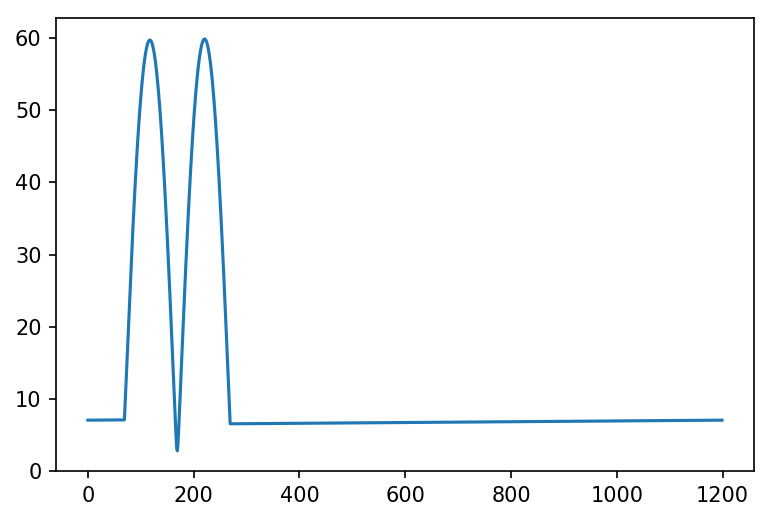

In [70]:
mytr=np.fft.ifft(np.fft.fft(aaa)*np.fft.fft(r_c))
plt.plot(np.abs(mytr))

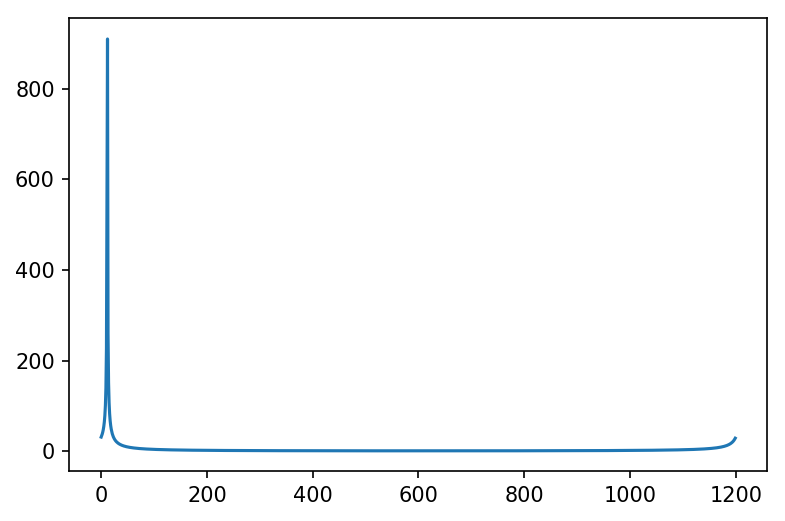

In [79]:
plt.plot(np.abs(np.fft.fft(r_c)))

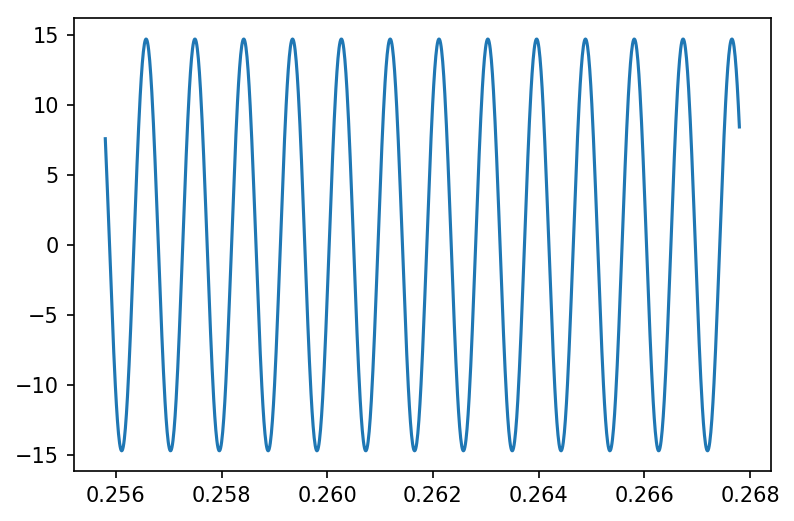

In [98]:
other=np.zeros(len(r_c))
other[13]=len(r_c)
mytr=np.fft.ifft(np.fft.fft(aaa)*other)
plt.plot(theta,np.real(mytr))

In [102]:
np.argmax(np.real(np.fft.fft(aaa)))

0